# MIE 1624 Final Assignment

Name: Danmeng Cui

Student Number: 1004004356

# 1. Data Cleaning

In [ ]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
from google.colab import files
import io
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df=pd.read_csv("/content/Covid19-vaccination.csv")
df

location  ... daily_people_vaccinated_per_hundred
0      Afghanistan  ...                                 NaN
1      Afghanistan  ...                               0.003
2      Afghanistan  ...                               0.003
3      Afghanistan  ...                               0.003
4      Afghanistan  ...                               0.003
...            ...  ...                                 ...
63001     Zimbabwe  ...                               0.132
63002     Zimbabwe  ...                               0.151
63003     Zimbabwe  ...                               0.172
63004     Zimbabwe  ...                               0.179
63005     Zimbabwe  ...                               0.192

[63006 rows x 16 columns]

In [ ]:
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

As can be seen, there is quite much missing data. Therefore, we will drop total_vaccinations missing data, since without this value any raw doesn't make much sense.

In [ ]:
df = df.drop(df[df.total_vaccinations.isna()].index)
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

In [ ]:
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df=check_df.fillna(0)
check_df.total_vaccinations==check_df.people_vaccinated+check_df.people_fully_vaccinated+check_df.total_boosters


0        True
6        True
22       True
44       True
59       True
         ... 
63000    True
63002    True
63003    True
63004    True
63005    True
Length: 33850, dtype: bool

As can bee seen from our data, the values of total_vaccinations column equals to the sum of people_vaccinated, people_fully_vaccinated and total_boosters.

Let's check the correlation.

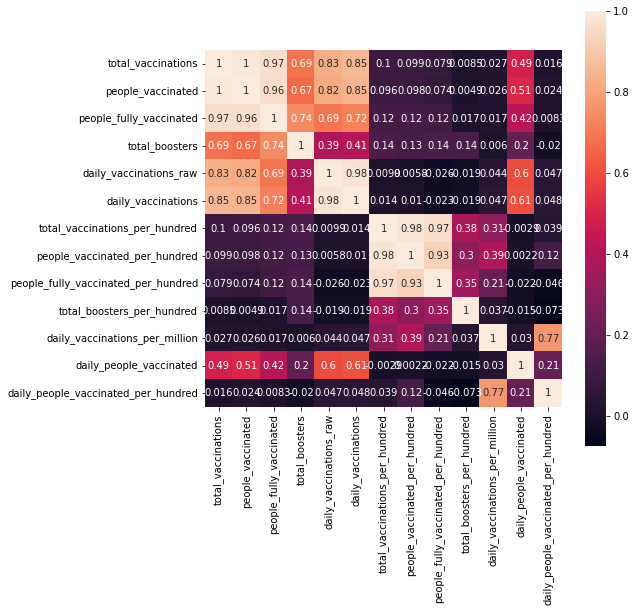

In [ ]:
#correlation matrix
plt.subplots(figsize=(8, 8))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()

As the correlation plot shows, total_vaccinations , people_vaccinated, people_fully_vaccinated and total_boosters are highly correlated. 

So, we will replace the NaN value of people_fully_vaccinated and  total_boosters with the value of 0. So that the value of people_vaccinated would be total_vaccinations-people_fully_vaccinated-total_boosters. 

In [ ]:
df.people_fully_vaccinated=df.people_fully_vaccinated.fillna(0)
df.total_boosters=df.total_boosters.fillna(0)
df.people_vaccinated=df.total_vaccinations - df.people_fully_vaccinated - df.total_boosters
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                          0
people_fully_vaccinated                    0
total_boosters                             0
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

Similar situation for the total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred and total_boosters_per_hundred. Although the equation can not represent exactly, due to the percentage round up. Same fillna method apply here. 

In [ ]:
df.people_fully_vaccinated_per_hundred=df.people_fully_vaccinated_per_hundred.fillna(0)
df.total_boosters_per_hundred=df.total_boosters_per_hundred.fillna(0)
df.people_vaccinated_per_hundred=df.total_vaccinations - df.people_fully_vaccinated_per_hundred - df.total_boosters_per_hundred
df.isna().sum()

location                                  0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
total_boosters                            0
daily_vaccinations_raw                 5806
daily_vaccinations                      235
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
total_boosters_per_hundred                0
daily_vaccinations_per_million          235
daily_people_vaccinated                 882
daily_people_vaccinated_per_hundred     882
dtype: int64

In order to determine the similarity between  each factor's  distributions, we can perform Mann-Whitney U test. 

Ho: The distributions are the same.

Ha: The distributions are not the same. 

In [ ]:
from scipy.stats import mannwhitneyu
nan_factors=['daily_vaccinations_raw','daily_vaccinations','daily_vaccinations_per_million','daily_people_vaccinated','daily_people_vaccinated_per_hundred']
df_new=pd.DataFrame()
for i in nan_factors:
    for j in nan_factors:
        p_value=mannwhitneyu(df[i], df[j])[1]
        df_new.at[i,j]=p_value

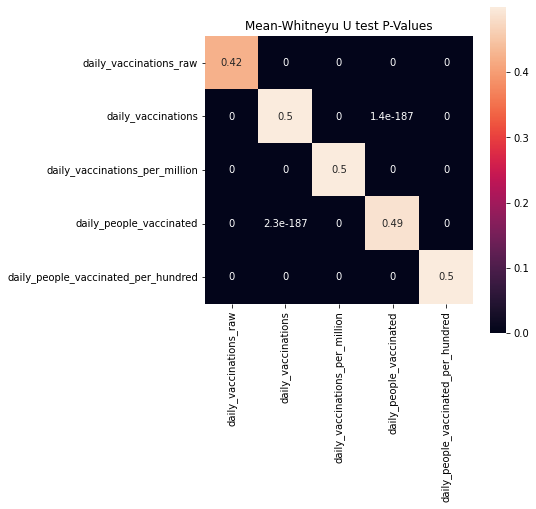

In [ ]:
plt.subplots(figsize=(6, 6))
sns.heatmap(df_new, annot=True, square=True, yticklabels = nan_factors, xticklabels = nan_factors)
plt.title('Mean-Whitneyu U test P-Values')
plt.show()

As the plot shows, the p-values are all smaller than 0.05, which rejects the null hypothsis, and implies that the distrbutions are not identical to each other for the rest of the factors. Therefore, we will simply fill the NaN values with 0. 

In [ ]:
for i in nan_factors:
    df[i] = df[i].fillna(0)
df.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
dtype: int64

#2. Data Visualization and Exploratory Data Analysis 

In [ ]:
location=df['location'].unique()
len(location)

235

There are 235 locations in this dataset in total.

location  people_vaccinated
0                World       4.219612e+09
1                 Asia       2.956543e+09
2                China       2.437252e+09
3  Upper middle income       2.219595e+09
4  Lower middle income       1.394208e+09
5          High income       8.612264e+08
6                India       7.669880e+08
7               Europe       4.416840e+08
8        North America       3.684038e+08
9        South America       2.987579e+08

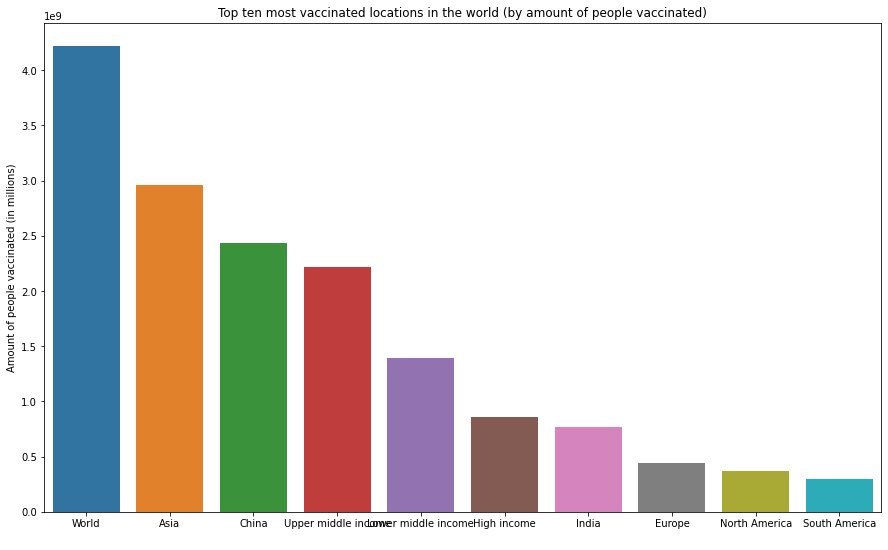

In [ ]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_total_vaccinations = df.groupby('location').people_vaccinated.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.dropna(axis=0).reset_index() # Dropping NaN values

display(total_vaccinations_f[0:10])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top ten most vaccinated locations in the world (by amount of people vaccinated)')
sns.barplot(x=total_vaccinations_f.location[0:10], y=total_vaccinations_f['people_vaccinated'])
plt.xlabel(' ')
plt.ylabel('Amount of people vaccinated (in millions)');

Since the top vaccinated locations have large populations, such that world should have the sum of all the countries vaccinated populations, Asia has the number one population among all the continents, China has the most population among all the countries, etc. this doesn't imply these locations has the highest vacination rate due to the large population. 

Therefore, we would like to figure out which location has the most effective vaccination program. 

location  daily_vaccinations
0                  World          43233999.0
1                   Asia          33335736.0
2    Upper middle income          27439252.0
3                  China          22424286.0
4    Lower middle income          16674499.0
..                   ...                 ...
230              Burundi                94.0
231                 Niue                87.0
232           Montserrat                53.0
233              Tokelau                23.0
234             Pitcairn                 1.0

[235 rows x 2 columns]

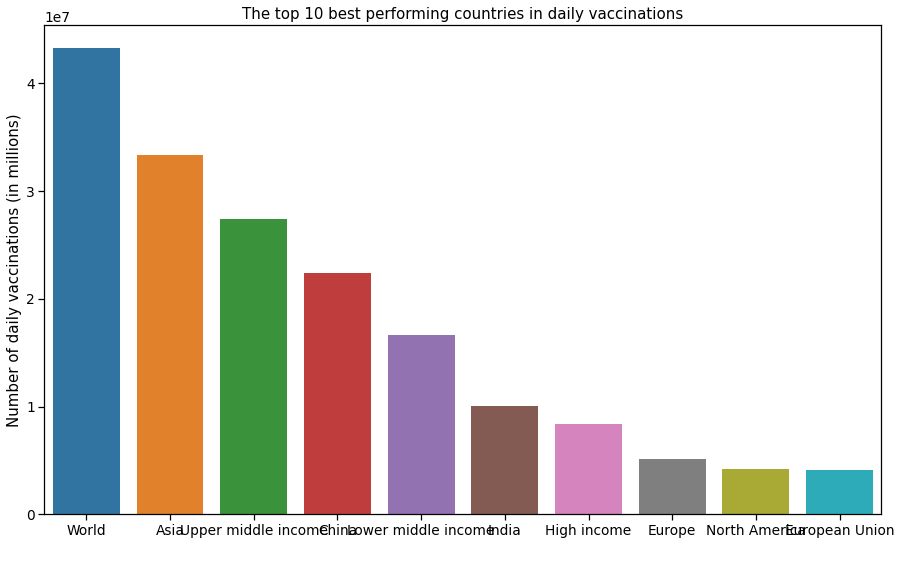

In [ ]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_daily = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily_f = top_daily.dropna(axis='rows').reset_index() # Dropping NaN values

display(top_daily_f)

# Plotting the data
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(15, 9))
    plt.title('The top 10 best performing countries in daily vaccinations')
    sns.barplot(x=top_daily_f.location[0:10], y=top_daily_f.daily_vaccinations[0:10])
    plt.xlabel(' ')
    plt.ylabel('Number of daily vaccinations (in millions)');

This plot has very similar pattern with the previous plot. We can see that Asia has a good performance of the vaccination performance. China and India are the two leading countries, which have good performance in vaccination. 

location        date  daily_vaccinations
13155  High income  2020-12-03                 0.0
13156  High income  2020-12-04                 0.0
13157  High income  2020-12-05                 0.0
13158  High income  2020-12-06                 0.0
13159  High income  2020-12-07                 0.0
...            ...         ...                 ...
35254        World  2021-08-29          42563528.0
35229        World  2021-08-04          42687088.0
35257        World  2021-09-01          42862506.0
35255        World  2021-08-30          43111105.0
35191        World  2021-06-27          43233999.0

[3298 rows x 3 columns]

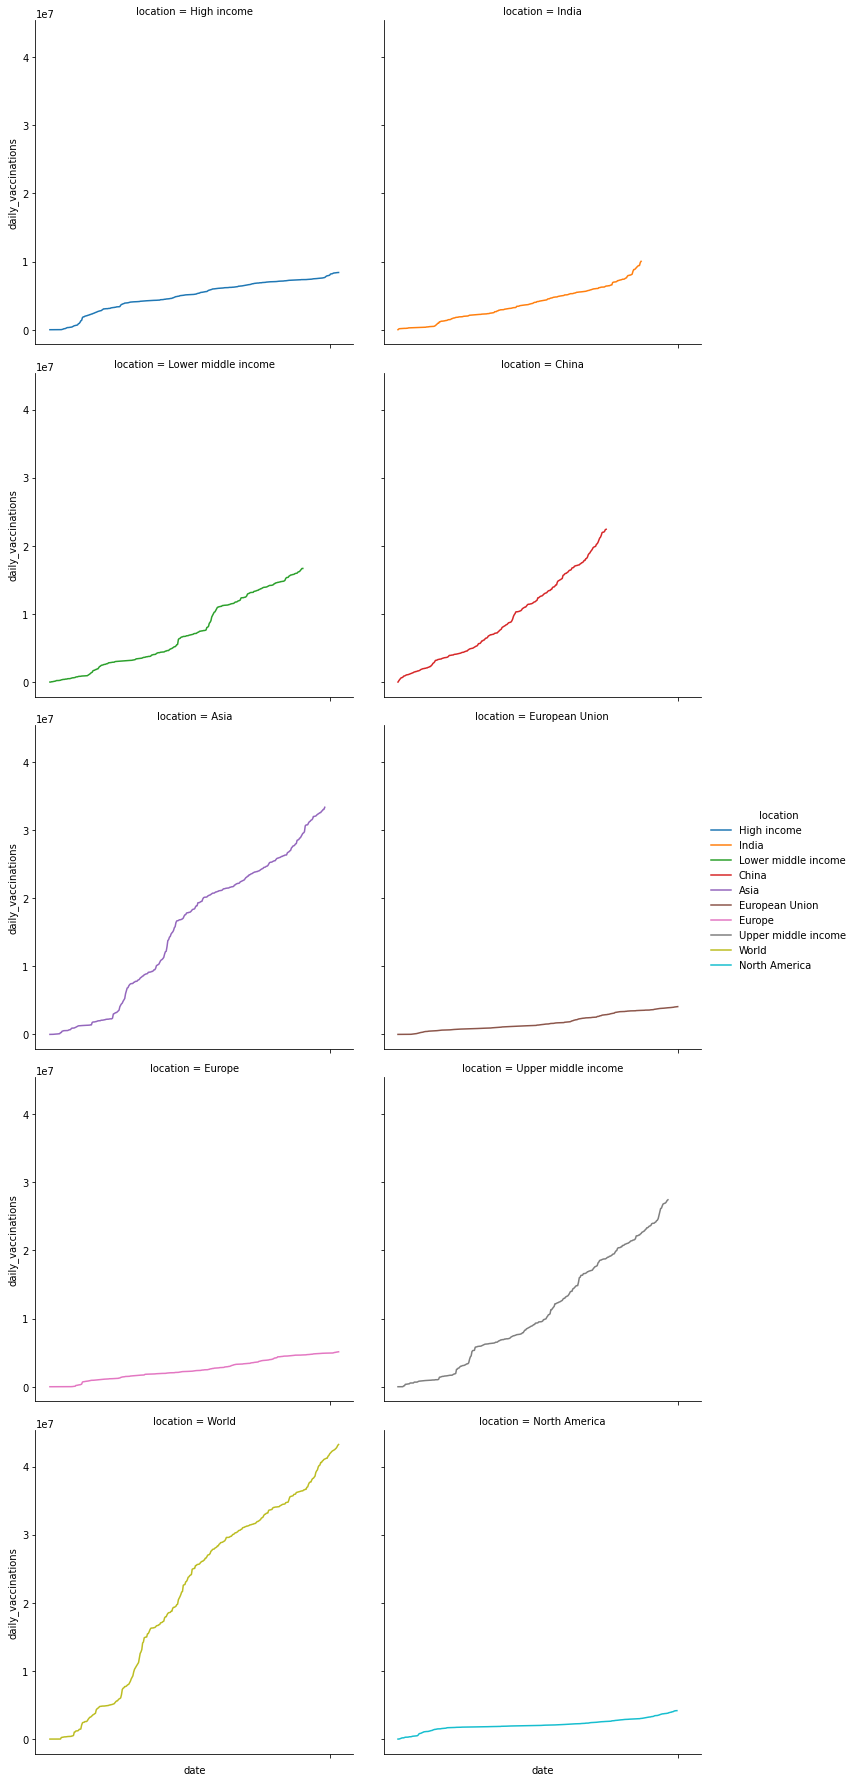

In [ ]:
# Establishing which columns are relevant and preparing the dataset
cols = ['location', 'date', 'daily_vaccinations']
covid_df = df.reset_index()

# Creating a list of the aforementioned best performing location in terms of daily vaccinations
top_10_location = list(top_daily_f.location[0:10])

# Filtering and sorting the data
daily_vacc_df = covid_df[['location', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)
top_10_dv_df = daily_vacc_df[daily_vacc_df.location.isin(top_10_location)].dropna()

display(top_10_dv_df) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

#plt.figure(figsize=(18, 32))
sns.relplot(data=top_10_dv_df, x='date', y='daily_vaccinations', hue='location', col='location', kind='line', col_wrap=2)
plt.xticks('');

World, Asia, China and Upper middle income's vaccination rates have growth exponentially in the given period. 
European Union, Europe and North America has the vaccination rate growth smoothly and slowly. 

However, Asia, China and India has shorter lines comparing to other countries. The reason might be there's shortage of vaccine. Or, since their vacinnation performances are good, people who would like to be vaccinated have got their vaccine already, which means no huge amount of vaccines are needed. 

#3. Model selection and fitting to data 

I will ues an ARIMA model here, to analyze and forecasting this type of time series data, since we would like to predict the future trend based on the existing pattren. 

**1. Canada**

Since no IDs are there in the dataset for unique locations, we can add it as given below, such that Afghanistan will be 1, Canada will be 38, China will be 44:

In [ ]:
#Create new columns based on distinct values and count them
df = df.sort_values('location')
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf=df.loc[df['eid'] == 38]

#check dataframe of Canada
sndf = ndf.sort_values('people_vaccinated_per_hundred')
sndf

location iso_code  ... daily_people_vaccinated_per_hundred  eid
9795    Canada      CAN  ...                               0.000   38
9796    Canada      CAN  ...                               0.002   38
9797    Canada      CAN  ...                               0.004   38
9798    Canada      CAN  ...                               0.006   38
9799    Canada      CAN  ...                               0.007   38
...        ...      ...  ...                                 ...  ...
10133   Canada      CAN  ...                               0.038   38
10134   Canada      CAN  ...                               0.041   38
10135   Canada      CAN  ...                               0.039   38
10136   Canada      CAN  ...                               0.039   38
10137   Canada      CAN  ...                               0.038   38

[343 rows x 17 columns]

In [ ]:
#Get the values from the column where vaccination rate of Canada (or country of your choice) is stored.
val = sndf['people_vaccinated_per_hundred'].values

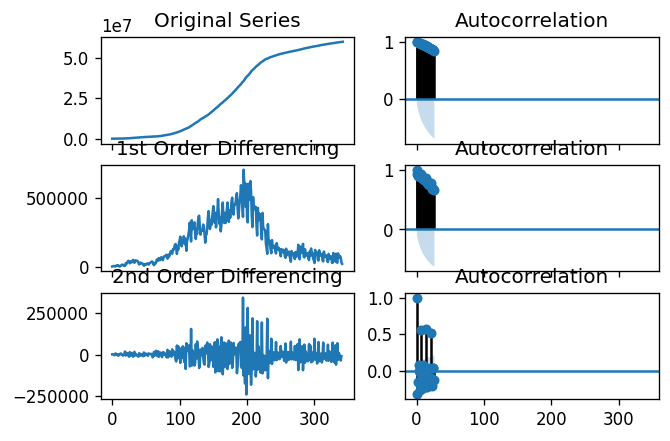

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

Most of the second order differencing's autocorrelation values are in the blue region and around 0. So, we will have d=2. 

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 41.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True, 
alpha=0.005)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=8372.488, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8472.284, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8436.252, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=8377.852, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8470.290, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=8368.977, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8407.220, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=8369.046, Time=0.29 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=8342.618, Time=0.56 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=8370.776, Time=0.80 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=8384.292, Time=0.75 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=8324.231, Time=2.37 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=8354.598, Time=1.24 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=8315.341, Time=2.73 sec
 ARIMA(3,2,3)(0,0,0)[0]          

The best model chosen is : ARIMA (p,d,q) = ARIMA(3,2,3).

As we assumed, second order differencing has to be performed for making the time series stationary in this scenario.

As the next step, perform diagnostic check for the residual as given below:

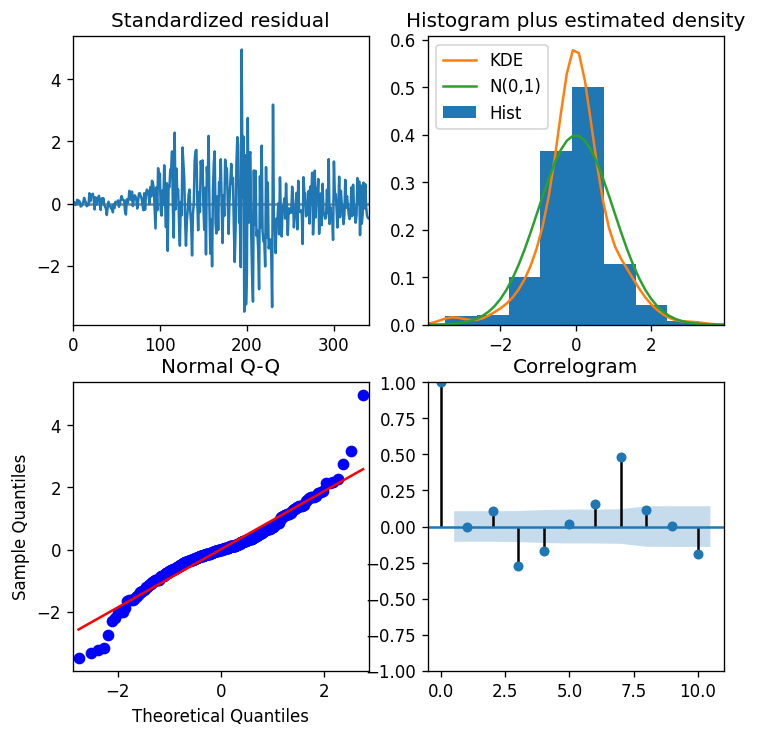

In [ ]:
model.plot_diagnostics(figsize=(7,7))
plt.show()

So the residuals are statinary and most of them are distributed with zero mean.
The histogram has a bell shape, which indicates a normal distribution. The Q-Q plot shows that the whole pattern almost follows the normal line. And most points in the correlogram are in the blue region, So the model has a relative good performance. 

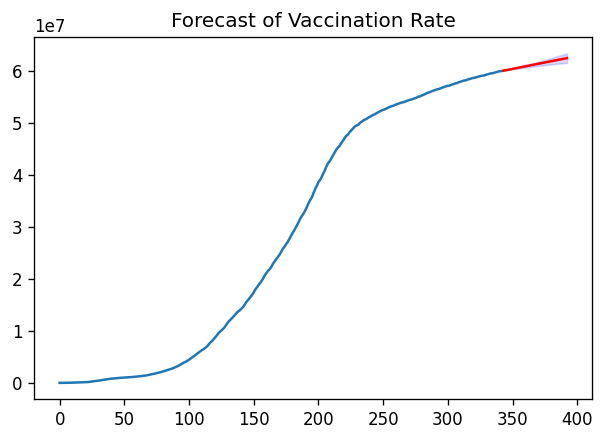

In [ ]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.8)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

Therefore, all the best and worst cases have the increasing trend, in the upcoming 50 days, we may predict that the Vacination Rate in Canada will grow. 

**2. China**

In [ ]:
#Create new columns based on distinct values and count them
df = df.sort_values('location')
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf=df.loc[df['eid'] == 44]

#check dataframe of China
sndf = ndf.sort_values('people_vaccinated_per_hundred')
sndf

location iso_code  ... daily_people_vaccinated_per_hundred  eid
11368    China      CHN  ...                               0.000   44
11384    China      CHN  ...                               0.000   44
11393    China      CHN  ...                               0.000   44
11397    China      CHN  ...                               0.000   44
11404    China      CHN  ...                               0.000   44
...        ...      ...  ...                                 ...  ...
11705    China      CHN  ...                               0.139   44
11706    China      CHN  ...                               0.139   44
11707    China      CHN  ...                               0.139   44
11708    China      CHN  ...                               0.000   44
11709    China      CHN  ...                               0.000   44

[257 rows x 17 columns]

In [ ]:
#Get the values from the column where vaccination rate of Afghanistan (or country of your choice) is stored.
val = sndf['people_vaccinated_per_hundred'].values

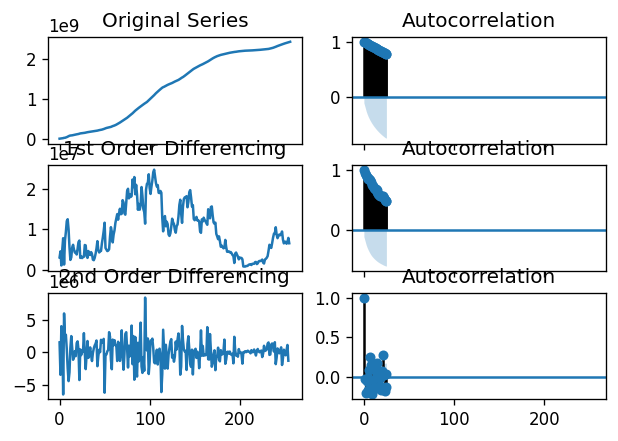

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True, 
alpha=0.005)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=8089.563, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8093.179, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8095.047, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=8095.053, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8091.201, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=8083.747, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=8086.078, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=8085.723, Time=0.43 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=8086.851, Time=0.93 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=8085.737, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=8087.343, Time=0.22 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=8087.897, Time=0.84 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=8081.794, Time=0.35 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=8087.608, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]          

The best model chosen is : ARIMA (p,d,q) = ARIMA(2,2,1).

As we assumed, second order differencing has to be performed for making the time series stationary in this scenario.

As the next step, perform diagnostic check for the residual as given below:

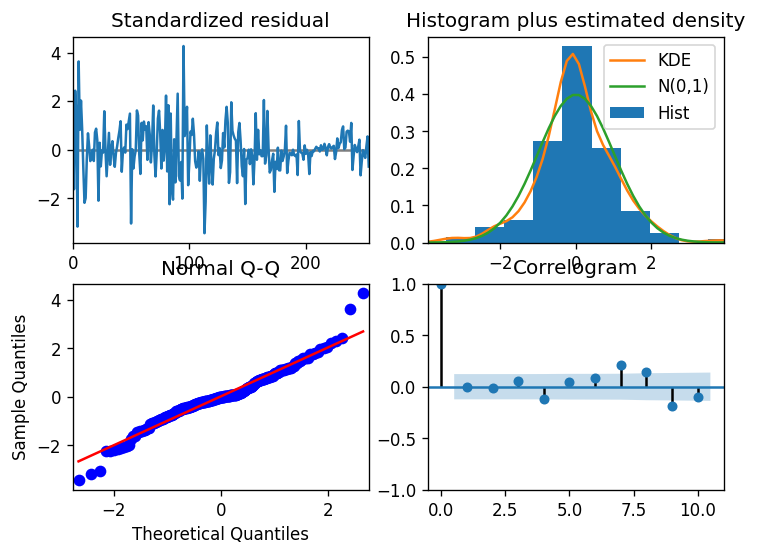

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

So most of the residuale are distributed with zero mean. The histogram has a bell shape, which indicates a normal distribution. The Q-Q plot shows that the whole pattern almost follows the normal line. And most points in the correlogram are in the blue region.

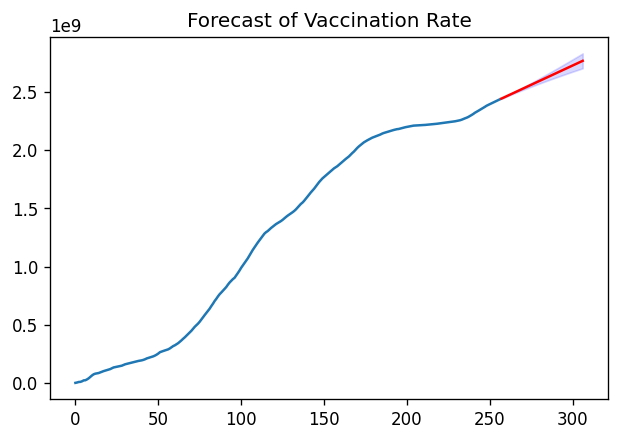

In [ ]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.8)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

Therefore, all the best and worst cases have the increasing trend, in the upcoming 50 days, we may predict that the Vacination Rate in China will grow rapdily.

#4. Relating COVID-19 Vaccination to a Second Dataset

In [ ]:
df_complete = pd.read_csv('/content/Complete_covid19_dataset.csv')
df_complete

iso_code  ... excess_mortality_cumulative_per_million
0           AFG  ...                                     NaN
1           AFG  ...                                     NaN
2           AFG  ...                                     NaN
3           AFG  ...                                     NaN
4           AFG  ...                                     NaN
...         ...  ...                                     ...
134454      ZWE  ...                                     NaN
134455      ZWE  ...                                     NaN
134456      ZWE  ...                                     NaN
134457      ZWE  ...                                     NaN
134458      ZWE  ...                                     NaN

[134459 rows x 67 columns]

In [ ]:
df_complete.isna().sum()

iso_code                                        0
continent                                    8578
location                                        0
date                                            0
total_cases                                  7393
                                            ...  
human_development_index                     18176
excess_mortality_cumulative_absolute       129736
excess_mortality_cumulative                129736
excess_mortality                           129736
excess_mortality_cumulative_per_million    129736
Length: 67, dtype: int64

As can be seen, there is quite much missing data. Therefore, we will drop total_vaccinations missing data, since without this value any raw doesn't make much sense.

In [ ]:
df_complete = df_complete.drop(df_complete[df_complete.total_vaccinations.isna()].index)
df_complete.isna().sum()

iso_code                                       0
continent                                   3902
location                                       0
date                                           0
total_cases                                 1767
                                           ...  
human_development_index                     5792
excess_mortality_cumulative_absolute       32599
excess_mortality_cumulative                32599
excess_mortality                           32599
excess_mortality_cumulative_per_million    32599
Length: 67, dtype: int64

In [ ]:
check_df_complete = df_complete.drop(df_complete[df_complete.people_vaccinated.isna()].index)
check_df_complete=check_df_complete.fillna(0)

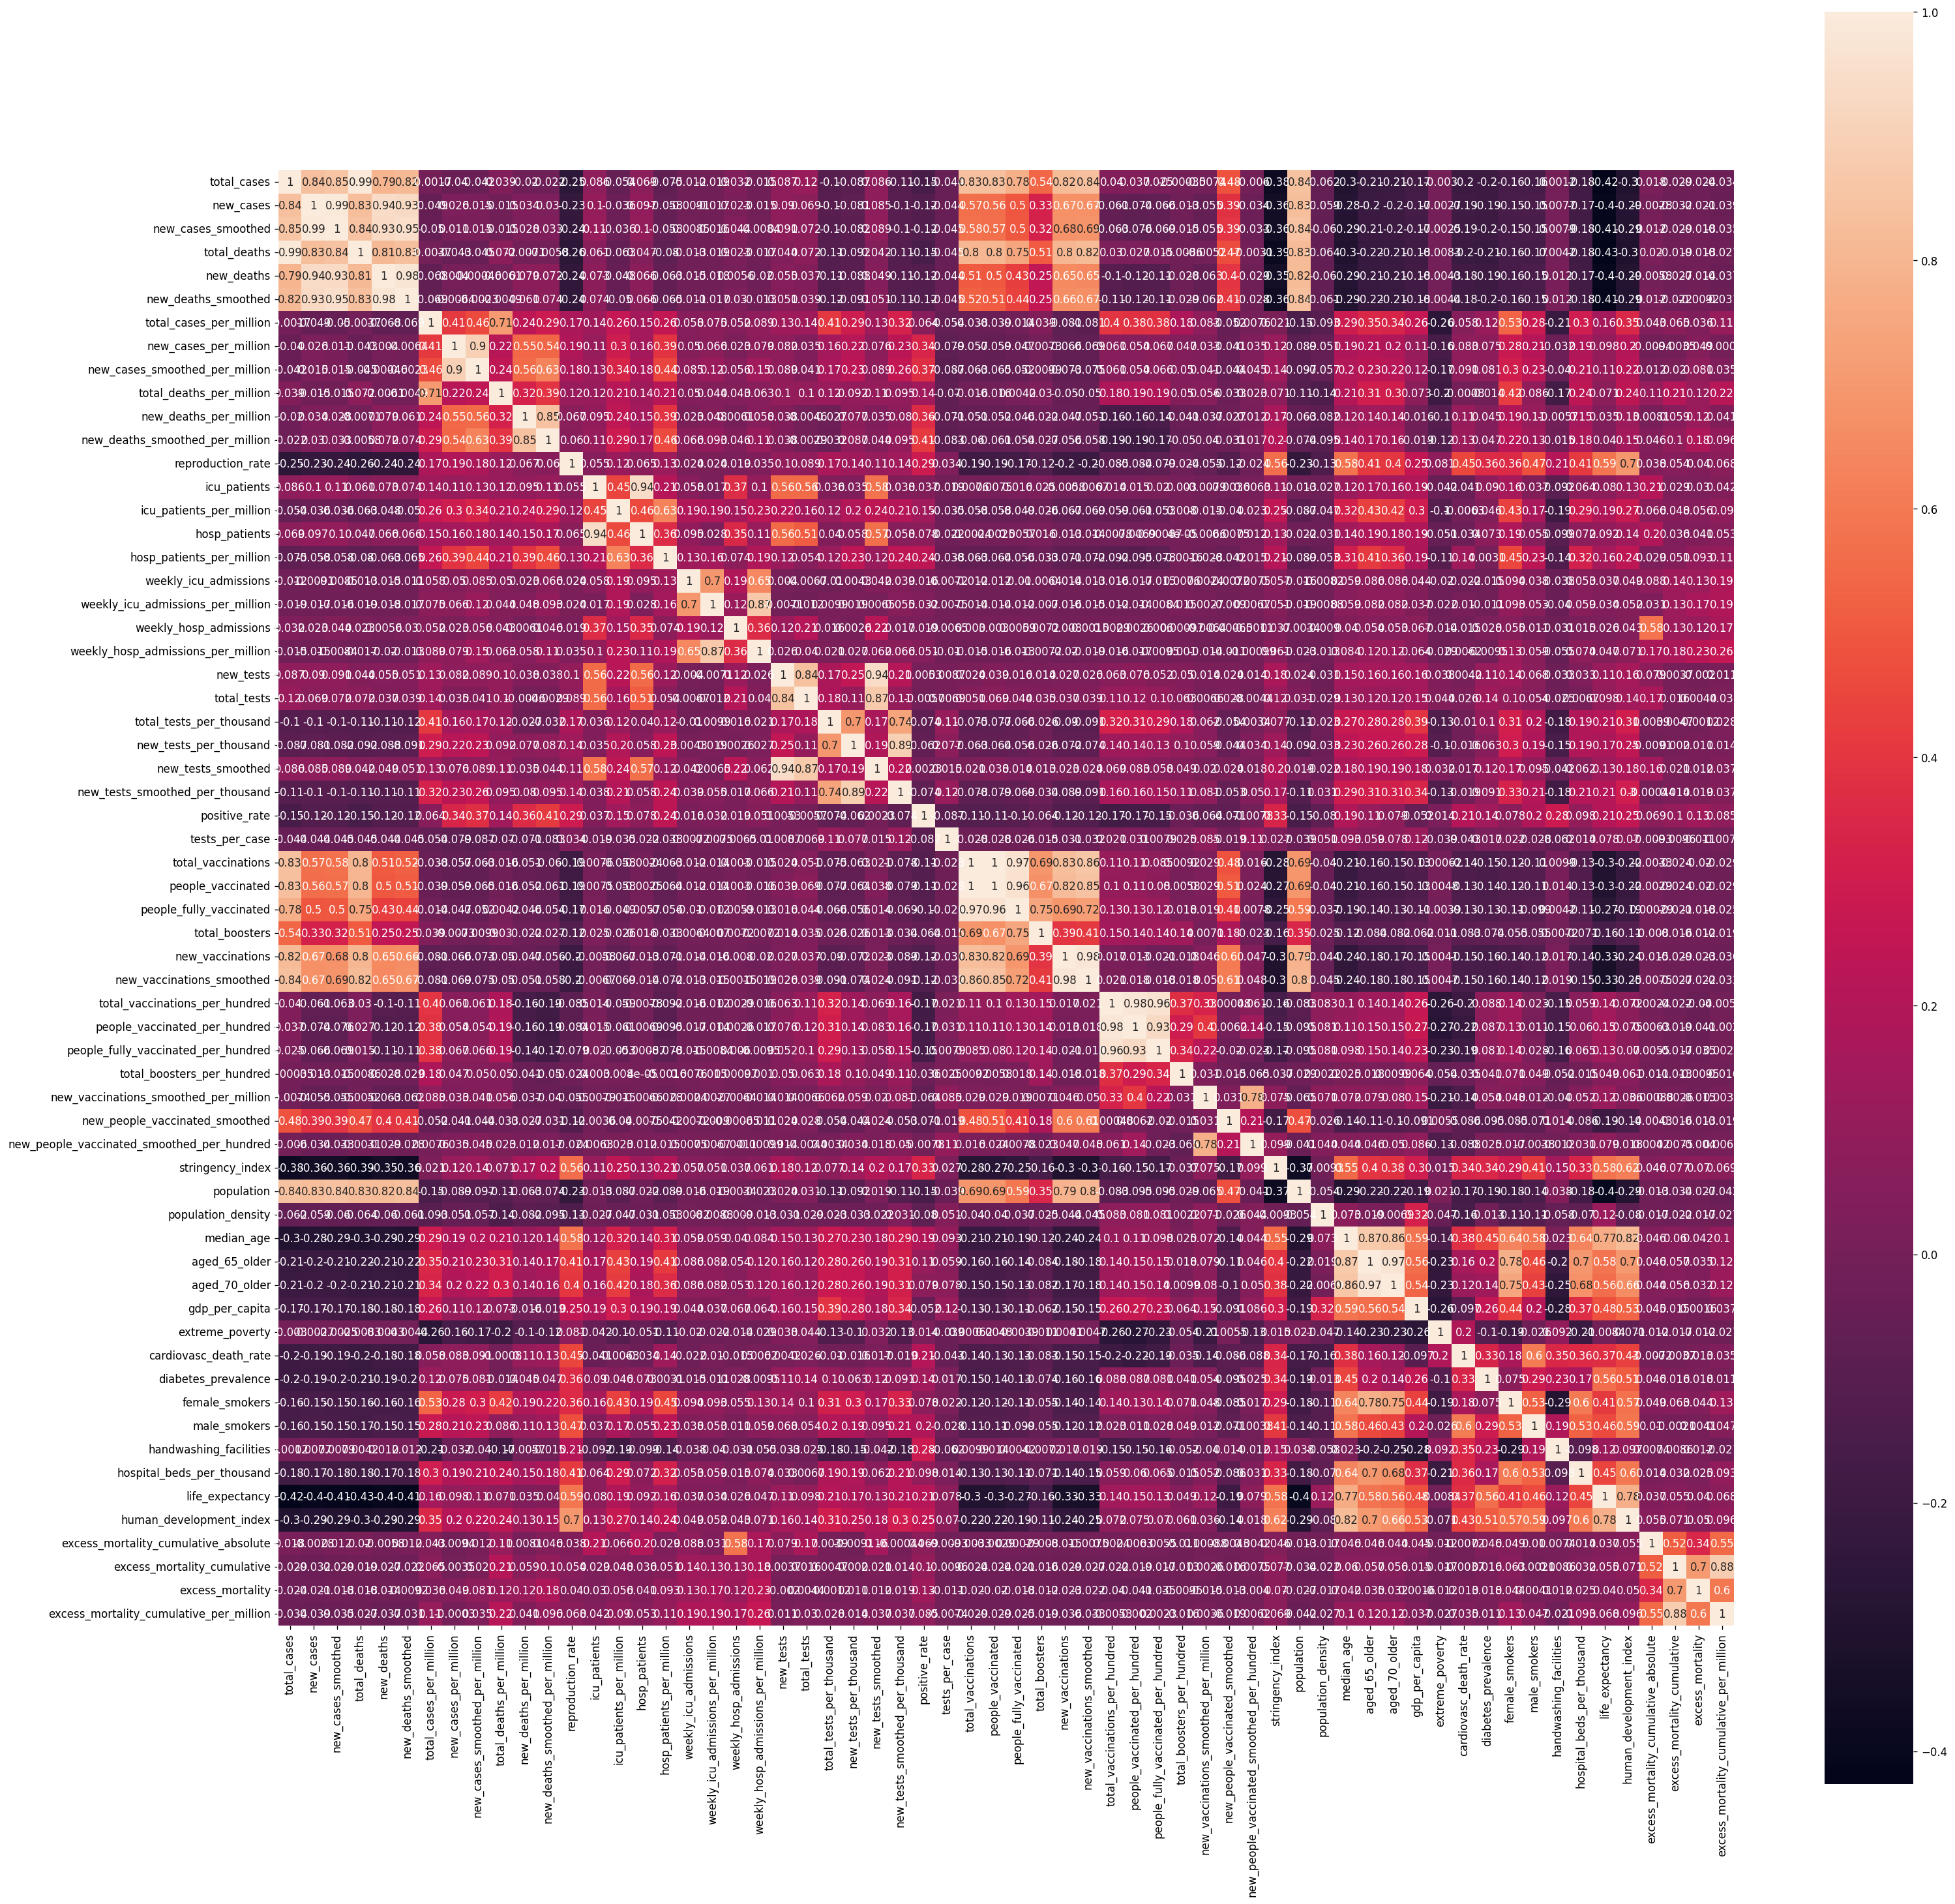

In [ ]:
#correlation matrix
plt.subplots(figsize=(30, 30))
sns.heatmap(check_df_complete.corr(), annot=True, square=True)
plt.show()

As we can see, total_vaccinations , people_vaccinated, people_fully_vaccinated and total_boosters are highly correlated.

So, we will replace the NaN value of people_fully_vaccinated and total_boosters with the value of 0. So that the value of people_vaccinated would be total_vaccinations-people_fully_vaccinated-total_boosters.

In [ ]:
df_complete.people_fully_vaccinated=df_complete.people_fully_vaccinated.fillna(0)
df_complete.total_boosters=df_complete.total_boosters.fillna(0)
df_complete.people_vaccinated=df_complete.total_vaccinations - df_complete.people_fully_vaccinated - df_complete.total_boosters
df_complete.isna().sum()

iso_code                                       0
continent                                   3902
location                                       0
date                                           0
total_cases                                 1767
                                           ...  
human_development_index                     5792
excess_mortality_cumulative_absolute       32599
excess_mortality_cumulative                32599
excess_mortality                           32599
excess_mortality_cumulative_per_million    32599
Length: 67, dtype: int64

In [ ]:
for i in df_complete.columns:
    df_complete[i] = df_complete[i].fillna(0)
df_complete.isna().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

I will compare the positive_rate, new_deaths and hosp_patients for people_vaccinated in Canada and China and U.S. 

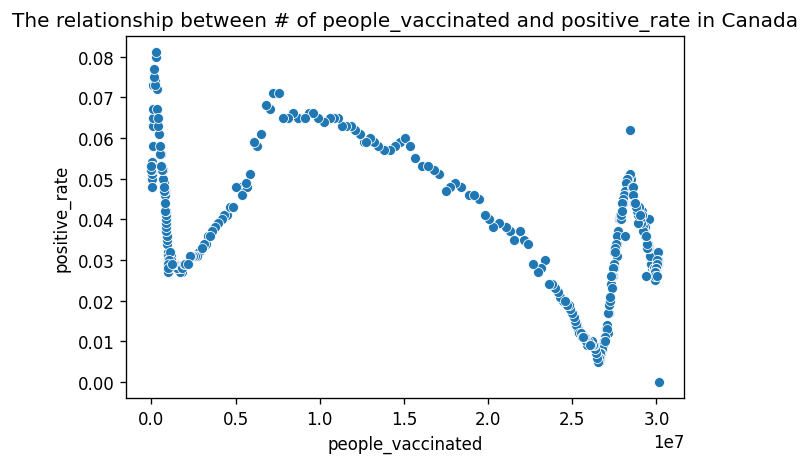

In [ ]:
#Create new columns based on distinct values and count them
df_complete = df_complete.sort_values('location')
df_complete['eid'] = (df_complete.groupby(['location']).cumcount()==0).astype(int)
df_complete['eid'] = df_complete['eid'].cumsum()
ndf_canada=df_complete.loc[df_complete['eid'] == 38]


ax = plt.axes()
sns.scatterplot(data=ndf_canada, x='people_vaccinated', y='positive_rate')
ax.set_title('The relationship between # of people_vaccinated and positive_rate in Canada')
plt.show()

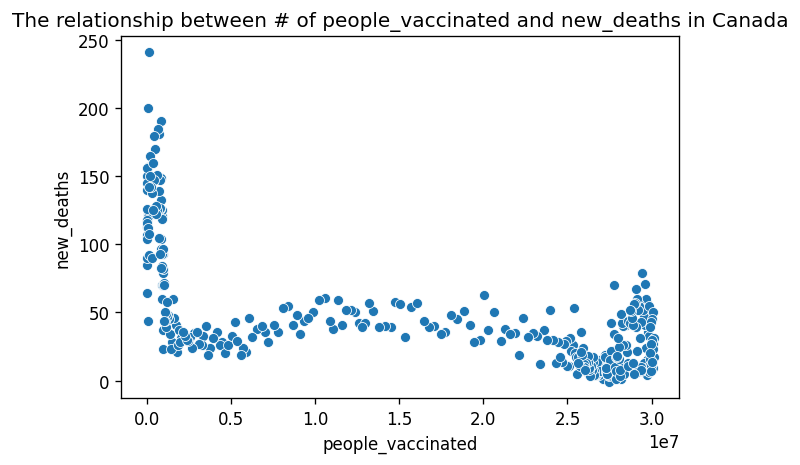

In [ ]:
ax = plt.axes()
sns.scatterplot(data=ndf_canada, x='people_vaccinated', y='new_deaths')
ax.set_title('The relationship between # of people_vaccinated and new_deaths in Canada')
plt.show()

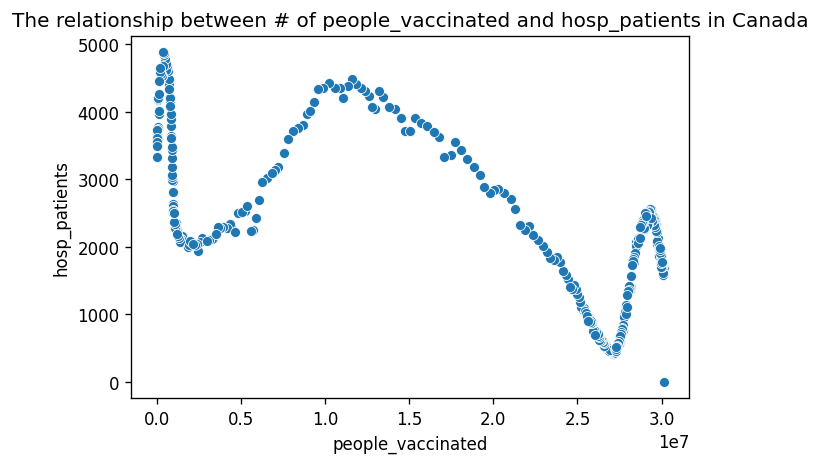

In [ ]:
ax = plt.axes()
sns.scatterplot(data=ndf_canada, x='people_vaccinated', y='hosp_patients')
ax.set_title('The relationship between # of people_vaccinated and hosp_patients in Canada')
plt.show()

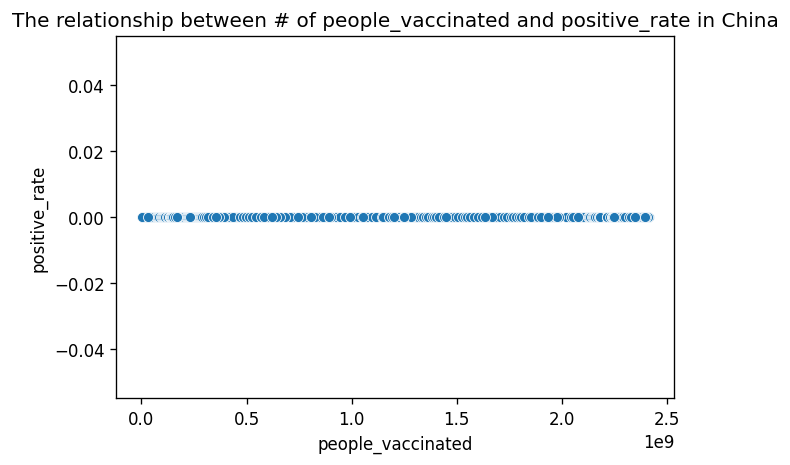

In [ ]:
#Create new columns based on distinct values and count them
df_complete = df_complete.sort_values('location')
df_complete['eid'] = (df_complete.groupby(['location']).cumcount()==0).astype(int)
df_complete['eid'] = df_complete['eid'].cumsum()
ndf_china=df_complete.loc[df_complete['eid'] == 44]


ax = plt.axes()
sns.scatterplot(data=ndf_china, x='people_vaccinated', y='positive_rate')
ax.set_title('The relationship between # of people_vaccinated and positive_rate in China')
plt.show()

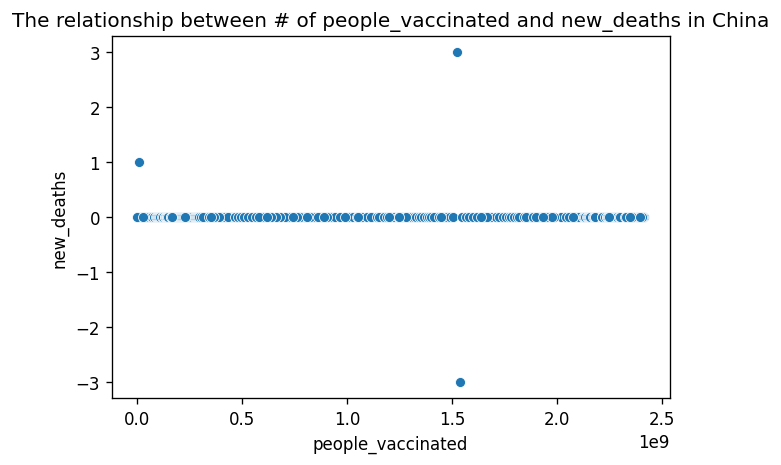

In [ ]:
ax = plt.axes()
sns.scatterplot(data=ndf_china, x='people_vaccinated', y='new_deaths')
ax.set_title('The relationship between # of people_vaccinated and new_deaths in China')
plt.show()

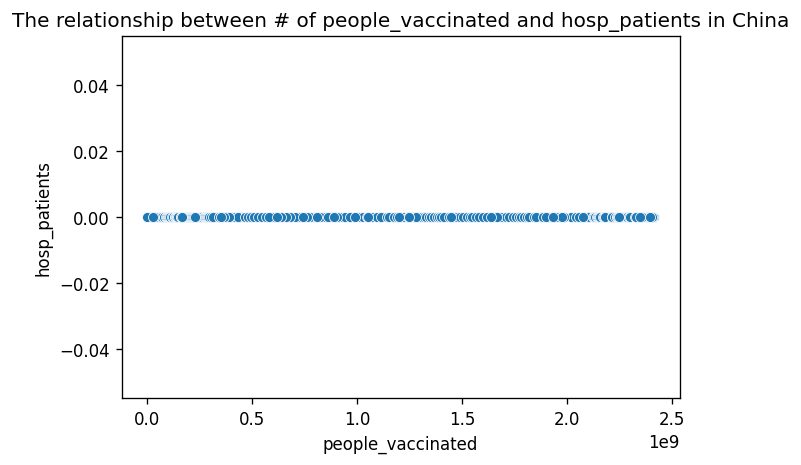

In [ ]:
ax = plt.axes()
sns.scatterplot(data=ndf_china, x='people_vaccinated', y='hosp_patients')
ax.set_title('The relationship between # of people_vaccinated and hosp_patients in China')
plt.show()

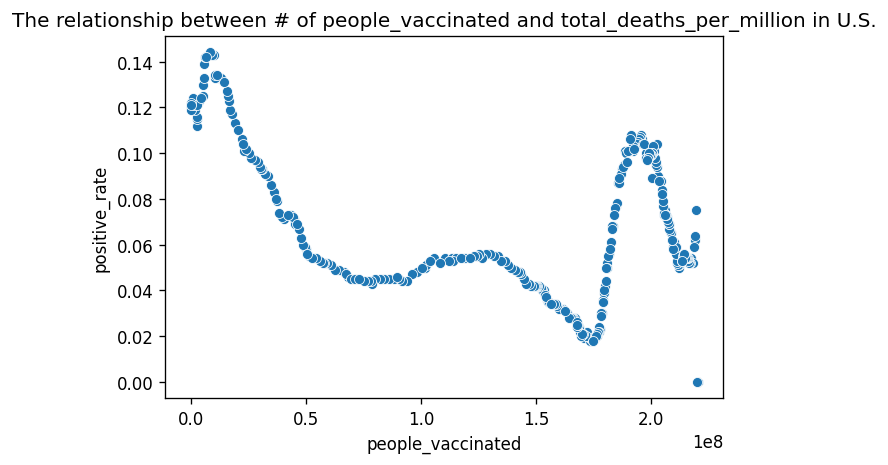

In [ ]:
#Create new columns based on distinct values and count them
df_complete = df_complete.sort_values('location')
df_complete['eid'] = (df_complete.groupby(['location']).cumcount()==0).astype(int)
df_complete['eid'] = df_complete['eid'].cumsum()
ndf_us=df_complete.loc[df_complete['eid'] == 220]


ax = plt.axes()
sns.scatterplot(data=ndf_us, x='people_vaccinated', y='positive_rate')
ax.set_title('The relationship between # of people_vaccinated and total_deaths_per_million in U.S.')
plt.show()

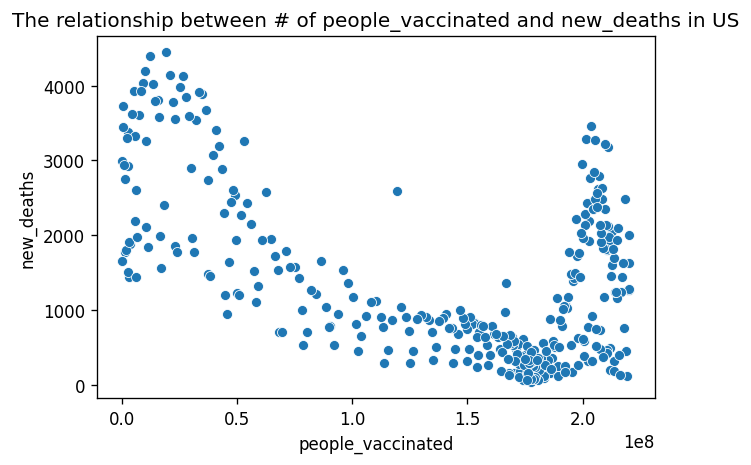

In [ ]:
ax = plt.axes()
sns.scatterplot(data=ndf_us, x='people_vaccinated', y='new_deaths')
ax.set_title('The relationship between # of people_vaccinated and new_deaths in US')
plt.show()

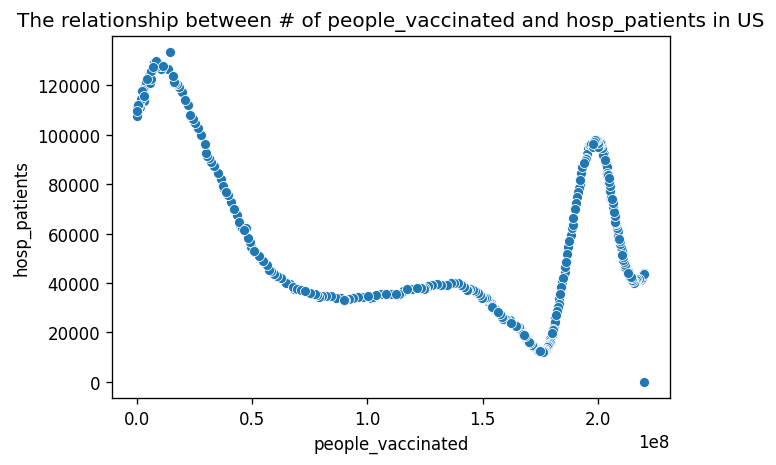

In [ ]:
ax = plt.axes()
sns.scatterplot(data=ndf_us, x='people_vaccinated', y='hosp_patients')
ax.set_title('The relationship between # of people_vaccinated and hosp_patients in US')
plt.show()

By comparing the rate of people_vaccinated and positive rate for Canada, China and U.S. We can tell that in Canada, with the increasing number of people get vaccinated, the positive rate drops and then increase (probably due to the delta-coronavirus), then drops and bounced up again (maybe due to open the border). 

Similar pattern applies to U.S. The positive rate increases and then keep decreasing, then increased dramatically when around 1.7 million people get vaccinated. Then, it drops again. 

For China, the positive rates keeps constantly 0, since there's strictly lockdowns in China, they controled the pandemic very well.  

#5. Deriving insights about the effect of vaccination and discussion 

From the analysis in Part 3 and Part 4. 30152206 people have been vaccinated in Canada, 2437252000 people have been vacinated in China. The vaccination rates are 79% and 88.5% respectively. In order to predict the upcoming 50 days vaccination rate, we fitted Canada in to ARIMA(3,2,3) model, and the result shows the vaccination rate will increase steadily. We fitted China into an ARIMA(2,2,1) model, it indicates the vaccination rate in China will increase faster than Canada. 

According to Part 4, I compared the relationship between number of people vaccinated and positive rate in China, Canada and U.S. With the increase of numberof people being vaccinated, China has constantly amlost 0 positive rate, due to the strict lockdowns and quarantine policies. 
Canada and U.S have similar pattern, the positive rates increased dramatically at first, with the lockdowns and vaccination, the positive rate drops significantly. Then it increased a little again, probably due to the spread of delta-coronavirus, and drops afterward, probably due to the lockdowns and higher vaccination rates. The positive rates increased again, probably caused by the loosen of lockdown policies. Then the positive rates drop again. 

I also compared the new death cases and the number of people vaccinated in three countries. The result shows that China has almost 0 new death cases during the given period, however, there are two positive points showing there are a few new death cases on 0 and 1.5. The new deaths for US and Canada almost keeps decreasing since the very beginning. 

The relationship between # of people_vaccinated and hosp_patients in three countries indicates the hospitalization compare to the vaccination rate. The patterns are quite similar to the positive rate ones. 

Overall, we can tell that vaccine is a useful intervention preventing people get Covid-19. With more people get vaccinated, we can see there's a downward trends of positive rates, hospotalization and death in Canada and US.  However, it is not 100% effective. If we want to reach a Covid-19 free environment and go back to normal life, people should keep social distancing carefully, the mandatory quarantine and lockdowns are also effective. China has done a good job controlling the pandemic.

In [ ]:
30152206.0/38222087
1.280870e+09	/1447387632


0.8849529812757168